In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy.stats import rankdata

def string2pair(information):
    if type(information) == np.float64:
        mean = information
        std = 0
    else:
        information = information.strip()
        information = information.strip(')')
        result = information.split('(')
        mean = float(result[0])
        std = float(result[1])
    return (mean,std)


# deep learning classifier:
#'MLP','FCN','ResNet','Encoder','MCNN','t-LeNet','MCDCNN','Time-CNN','TWIESN','InceptionTime','OS-CNN'
#'OS-CNN-ENS(2)','OS-CNN-ENS(3)','OS-CNN-ENS(4)',...,'OS-CNN-ENS(10)',

# traditional classifier:
#'1-NN DTW','1-NN DTW CV','TSBF','LS','EE(PROP)','BOSS','ST','WEASEL','HIVE-COTE','COTE','PF'


# full
get_result_list = ['Encoder','FCN','ResNet','MLP','MCNN','t-LeNet','MCDCNN',
                    'Time-CNN','TWIESN','1-NN DTW CV','1-NN DTW',
                    'LS','TSBF','EE(PROP)','PF','ST','BOSS','WEASEL','Flat-COTE','HIVE-COTE','InceptionTime',
                   'OS-CNN','OS-CNN-ENS(5)','OS-CNN-ENS(8)']


# ablation study of general solution
#get_result_list = ['FCN(16)','FCN(50)','FCN(100)','FCN(150)','FCN(200)','OS-CNN']

#SOTA
#get_result_list = ['ST','ResNet','WEASEL','HIVE-COTE','InceptionTime','OS-CNN-ENS(8)']

#ablation
#get_result_list = ['ST','ResNet','WEASEL','InceptionTime','OS-CNN-ENS(5)']

#non ensemble SOTA baseline
#get_result_list = ['ResNet','WEASEL','OS-CNN'] 

#get_result_list = ['OS-CNN','OS-CNN-ENS(2)','OS-CNN-ENS(3)','OS-CNN-ENS(4)','OS-CNN-ENS(5)','OS-CNN-ENS(6)','OS-CNN-ENS(7)','OS-CNN-ENS(8)']

#get_result_list =['ST','ResNet','WEASEL','HIVE-COTE','InceptionTime','OS-CNN']

print(get_result_list)

['Encoder', 'FCN', 'ResNet', 'MLP', 'MCNN', 't-LeNet', 'MCDCNN', 'Time-CNN', 'TWIESN', '1-NN DTW CV', '1-NN DTW', 'LS', 'TSBF', 'EE(PROP)', 'PF', 'ST', 'BOSS', 'WEASEL', 'Flat-COTE', 'HIVE-COTE', 'InceptionTime', 'OS-CNN', 'OS-CNN-ENS(5)', 'OS-CNN-ENS(8)']


In [2]:

result_path = './Full_result.csv'


file = pd.read_csv(result_path)
result_block = np.zeros([file.shape[0],len(get_result_list)])
for i in range(file.shape[0]):
    data_name = file['dataset_name'][i]
    for j, keras_Baseline in enumerate (get_result_list):
        temp = string2pair(file[keras_Baseline][i])
        result_block[i,j] = temp[0]
print('average accuracy', np.mean(result_block,axis=0))

average accuracy [74.86470588 80.85176471 82.49176471 72.59529412 38.46       36.18352941
 68.20823529 72.05176471 68.02705882 76.00352941 73.77882353 78.74331316
 77.80679169 79.27308614 80.41877305 82.23617139 81.01932183 83.34235294
 83.81253894 84.7139969  84.52882353 83.70894118 84.61372253 84.77430952]


In [3]:


def get_maxest_index(result_block):
    index = np.argsort(result_block,axis = 1)
    temp = np.zeros(result_block.shape)
    for i in range(result_block.shape[0]):
        l=result_block[i,:]
        temp[i,:] = rankdata(l,method='min')
        temp[i,:] = rankdata(l)
    return temp



def get_average_rank_and_wins(result_block):
    max_index_result = get_maxest_index(-result_block)
    average_rank =  np.around( np.average(max_index_result,axis=0), decimals=3)
    

    wins = np.count_nonzero(max_index_result==1, axis = 0)

    return average_rank, wins

average_rank, wins= get_average_rank_and_wins(result_block)

print('average rank',average_rank)
print('wins', wins)


average rank [14.888 10.106  8.624 16.765 22.824 23.118 18.    17.3   18.329 15.629
 16.753 12.406 12.724 12.447 11.159 10.053 10.988  8.135  7.535  5.765
  6.282  8.324  6.247  5.6  ]
wins [ 0  7  1  0  0  0  0  0  0  0  0  2  5  3  2  3  2  6  1 12  9  0  1 15]


In [4]:
import pandas as pd
def blod_min(array):
    blod_val = min(array)
    output_result = []
    for i in array:
        if i == blod_val:
            element_str = 'blodstart '+str(i)+' blodend'
        else:
            element_str = str(i)
        output_result.append(element_str)    
    return output_result

def blod_max(array):
    blod_val = max(array)
    output_result = []
    for i in array:
        if i == blod_val:
            element_str = 'blodstart '+str(i)+' blodend'
        else:
            element_str = str(i)
        output_result.append(element_str)    
    return output_result


df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

df.loc['Average rank'] = average_rank
df.loc['Counts of wins'] = wins
print(df.index[df.index=='Average rank'])
print(df,end='\n\n')



df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

average_accuracy_dp = np.round(np.mean(result_block,axis=0),2)

df.loc['Average rank'] = blod_min(average_rank)
df.loc['Counts of wins'] = blod_max(wins)
df.loc['Average accuracy(\%)'] = blod_max(average_accuracy_dp)

z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")

print(z)


Index(['Average rank'], dtype='object')
                     0       1       2       3       4        5       6   \
Classifier      Encoder     FCN  ResNet     MLP    MCNN  t-LeNet  MCDCNN   
Average rank     14.888  10.106   8.624  16.765  22.824   23.118      18   
Counts of wins        0       7       1       0       0        0       0   

                      7       8            9   ...      14      15      16  \
Classifier      Time-CNN  TWIESN  1-NN DTW CV  ...      PF      ST    BOSS   
Average rank        17.3  18.329       15.629  ...  11.159  10.053  10.988   
Counts of wins         0       0            0  ...       2       3       2   

                    17         18         19             20      21  \
Classifier      WEASEL  Flat-COTE  HIVE-COTE  InceptionTime  OS-CNN   
Average rank     8.135      7.535      5.765          6.282   8.324   
Counts of wins       6          1         12              9       0   

                           22             23  
Classifier

Encoder WilcoxonResult(statistic=235.0, pvalue=4.7563813604049385e-12)
FCN WilcoxonResult(statistic=728.0, pvalue=1.1310481803837744e-05)
ResNet WilcoxonResult(statistic=844.0, pvalue=0.0001976977970425529)
MLP WilcoxonResult(statistic=61.5, pvalue=1.0081733873784442e-14)
MCNN WilcoxonResult(statistic=2.0, pvalue=1.2552722229454995e-15)
t-LeNet WilcoxonResult(statistic=4.0, pvalue=1.3478045367118807e-15)
MCDCNN WilcoxonResult(statistic=99.5, pvalue=3.6835856413709114e-14)
Time-CNN WilcoxonResult(statistic=77.0, pvalue=1.7160199425886393e-14)
TWIESN WilcoxonResult(statistic=39.0, pvalue=6.8732861773080595e-15)
1-NN DTW CV WilcoxonResult(statistic=185.5, pvalue=1.5351398243085069e-12)
1-NN DTW WilcoxonResult(statistic=88.0, pvalue=1.323491430326825e-13)
LS WilcoxonResult(statistic=409.0, pvalue=1.04808235151332e-08)
TSBF WilcoxonResult(statistic=482.5, pvalue=2.9167328294355984e-08)
EE(PROP) WilcoxonResult(statistic=382.0, pvalue=1.7488022163062431e-09)
PF WilcoxonResult(statistic=456.0,

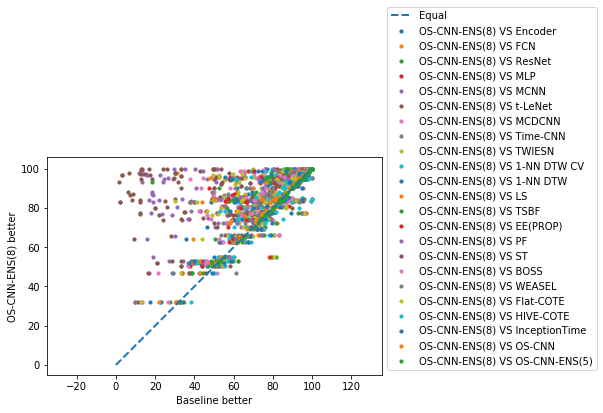

In [5]:
df = pd.DataFrame({'Classifier': ['Baseline wins',get_result_list[-1]+' wins','Same']})
df = df.T

fig = plt.figure()
plt.xlabel('Baseline better')
plt.ylabel(get_result_list[-1]+' better')
plt.plot([0,100], [0,100], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
plt.axis('equal')
for i in range(len(get_result_list)-1):
    temp = result_block[:,[i,-1]]
    temp = np.around(result_block[:,[i,-1]], decimals=2)
    print(get_result_list[i],wilcoxon(temp[:,0],temp[:,1])) 
    max_index_temp = get_maxest_index(-temp)
    wins = np.count_nonzero(max_index_temp<2, axis = 0)
    count_same = (wins[0]+wins[1]-85)
    loss_win_tie = [wins[0]-count_same,wins[1]-count_same,count_same]
    df.loc[get_result_list[i]] = blod_max(loss_win_tie)
    plt.scatter(temp[:,0],temp[:,1],label = get_result_list[-1]+' VS '+get_result_list[i], s =10)
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
print(df)
z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

fig.savefig("./result_compare.pdf", bbox_inches='tight')

In [6]:
df = pd.DataFrame(['classifier_name','dataset_name','accuracy'])
df = df.T
dataset_name_list = file['dataset_name']
#print(dataset_name_list)
for j,classifier_name in enumerate(get_result_list):
    for i,dataset_name in enumerate(dataset_name_list):
        #print(classifier_name,i,result_block[i,j])
        #print(classifier_name,i,result_block[i,j])
        df = df.append([[classifier_name,i,result_block[i,j]]]) 
example_path = './CD_diagram/example.csv'
df.to_csv(example_path,index=False,header =False )

In [7]:
Image_Outline =['Adiac',
'ArrowHead',
'BeetleFly',
'BirdChicken',
'Car',
'DiatomSizeReduction',
'DistalPhalanxOutlineAgeGroup',
'DistalPhalanxOutlineCorrect',
'DistalPhalanxTW',
'FaceAll',
'FaceFour',
'FacesUCR',
'FiftyWords',
'Fish',
'HandOutlines',
'Herring',
'MedicalImages',
'MiddlePhalanxOutlineAgeGroup',
'MiddlePhalanxOutlineCorrect',
'MiddlePhalanxTW',
'OSULeaf',
'PhalangesOutlinesCorrect',
'Plane',
'ProximalPhalanxOutlineAgeGroup',
'ProximalPhalanxOutlineCorrect',
'ProximalPhalanxTW',
'ShapesAll',
'SwedishLeaf',
'Symbols',
'WordSynonyms',
'Worms',
'WormsTwoClass',
'Yoga'
 ]

Motion_Sensors = ['CricketX',
'CricketY',
'CricketZ',
'GunPoint',
'Haptics',
'InlineSkate',
'ToeSegmentation1',
'ToeSegmentation2',
'UWaveGestureLibraryAll',
'UWaveGestureLibraryX',
'UWaveGestureLibraryY',
'UWaveGestureLibraryZ']

Sensor_Readings=['Beef',
'ChlorineConcentration',
'CinCECGTorso',
'Coffee',
'Computers',
'Earthquakes',
'ECG200',
'ECG5000',
'ECGFiveDays',
'ElectricDevices',
'FordA',
'FordB',
'Ham',
'InsectWingbeatSound',
'ItalyPowerDemand',
'LargeKitchenAppliances',
'Lightning2',
'Lightning7',
'Meat',
'MoteStrain',
'NonInvasiveFetalECGThorax1',
'NonInvasiveFetalECGThorax2',
'OliveOil',
'Phoneme',
'RefrigerationDevices',
'ScreenType',
'SmallKitchenAppliances',
'SonyAIBORobotSurface1',
'SonyAIBORobotSurface2',
'StarLightCurves',
'Strawberry',
'Trace',
'TwoPatterns',
'Wafer',
'Wine']

Synthetic=['CBF',
         'Mallat',
          'ShapeletSim',
          'SyntheticControl',
          'TwoLeadECG'
          ]











In [8]:
result_path = './Full_result.csv'

file = pd.read_csv(result_path)
dataset_type_list= [Image_Outline, Motion_Sensors, Sensor_Readings,Synthetic]
dataset_type_name_list= ['Image_Outline', 'Motion_Sensors', 'Sensor_Readings','Synthetic']



df = pd.DataFrame({'Classifier': get_result_list})
df = df.T


for dataset_type_index,dataset_type in enumerate(dataset_type_list):
    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)
        for j, keras_Baseline in enumerate (get_result_list):
            temp = file.iloc[dfb][keras_Baseline]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
    average_rank, wins= get_average_rank_and_wins(result_block)
    #temp = np.round(wins*100/np.sum(wins),2)
    #print(average_rank, wins)
    df.loc[dataset_type_name_list[dataset_type_index]+'('+str(len(dataset_type))+')'] = blod_min(average_rank)


z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

\begin{tabular}{|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline
Classifier          &  Encoder &     FCN &  ResNet &     MLP &    MCNN &  t-LeNet &  MCDCNN &  Time-CNN &  TWIESN &  1-NN DTW CV &  1-NN DTW &      LS &    TSBF &  EE(PROP) &      PF &      ST &    BOSS &  WEASEL &  Flat-COTE &                HIVE-COTE &  InceptionTime &  OS-CNN &  OS-CNN-ENS(5) &            OS-CNN-ENS(8)  \\ \hline
Image\_Outline(33)   &   14.894 &  10.439 &   9.091 &  16.773 &  22.879 &   22.909 &  16.939 &    16.394 &  18.061 &       16.439 &    17.152 &  12.894 &  11.788 &    12.773 &  10.833 &  10.985 &  10.288 &   7.258 &      8.515 &                    6.015 &          6.409 &   8.485 &          6.182 &  \textbf{5.606} \\ \hline
Motion\_Sensors(12)  &   15.583 &   11.75 &   10.75 &  16.333 &    23.0 &   23.333 &   20.25 &    19.875 &  18.958 &         14.5 &    16.917 &  10.875 &  13.083 &    11.417 &  10.375 &  10.208 &  10.792 &  10.042 &      6.458 &                    4.292 &        

In [9]:
Size_1_to_100 =[
'ItalyPowerDemand',
'SyntheticControl',
'SonyAIBORobotSurface2',
'SonyAIBORobotSurface1',
'DistalPhalanxOutlineAgeGroup',
'DistalPhalanxOutlineCorrect',
'DistalPhalanxTW',
'MiddlePhalanxOutlineAgeGroup',
'MiddlePhalanxOutlineCorrect',
'MiddlePhalanxTW',
'PhalangesOutlinesCorrect',
'ProximalPhalanxOutlineAgeGroup',
'ProximalPhalanxOutlineCorrect',
'ProximalPhalanxTW',
'TwoPatterns',
'MoteStrain',
'ECG200',
'ElectricDevices',
'MedicalImages',
]

Size_101_to_200=[
'CBF',
'SwedishLeaf',
'TwoLeadECG',
'FaceAll',
'FacesUCR',
'ECGFiveDays',
'ECG5000',
'Plane',
'GunPoint',
'Wafer',
'ChlorineConcentration',
'Adiac',

]

Size_201_to_300 =[
'Wine',
'Strawberry',
'ArrowHead',
'InsectWingbeatSound',
'FiftyWords',
'WordSynonyms',
'Trace',
'ToeSegmentation1',
'Coffee',
'CricketX',
'CricketY',
'CricketZ',
]

Size_301_to_400 =[
'UWaveGestureLibraryAll',
'UWaveGestureLibraryX',
'UWaveGestureLibraryY',
'Lightning7',
'ToeSegmentation2',
'DiatomSizeReduction',
'FaceFour',
]

Size_401_to_500 =[
'Symbols',
'Yoga',
'OSULeaf',
'Ham',
'Meat',
'Fish',
'Beef',
'FordA',
'FordB',
'ShapeletSim',
]
Size_501_to_600 =[
    'BeetleFly',
'BirdChicken',
'Car',
'Earthquakes',
'Herring',
'ShapesAll',
'OliveOil',
]
Size_601_to_ =[
'Lightning2',
'Computers',
'LargeKitchenAppliances',
'RefrigerationDevices',
'ScreenType',
'SmallKitchenAppliances',
'NonInvasiveFetalECGThorax1',
'NonInvasiveFetalECGThorax2',
'Worms',
'WormsTwoClass',
'UWaveGestureLibraryZ',
'Mallat',
'Phoneme',
'StarLightCurves',
'Haptics',
'CinCECGTorso',
'InlineSkate',
'HandOutlines',]


In [10]:
file = pd.read_csv(result_path)
dataset_type_list= [
    Size_1_to_100, 
    Size_101_to_200, 
    Size_201_to_300,
    Size_301_to_400,
    Size_401_to_500,
    Size_501_to_600,
    Size_601_to_]

dataset_type_name_list= [
    'Size_1_to_100', 
    'Size_101_to_200', 
    'Size_201_to_300',
    'Size_301_to_400',
'Size_401_to_500',
'Size_501_to_600',
'Size_601_to_',
]



data_name_list = file['dataset_name']

df = pd.DataFrame({'Classifier': get_result_list})
df = df.T


for dataset_type_index,dataset_type in enumerate(dataset_type_list):

    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)
        for j, keras_Baseline in enumerate (get_result_list):
            temp = file.iloc[dfb][keras_Baseline]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
        
    average_rank, wins= get_average_rank_and_wins(result_block)
    print(average_rank, wins)
    #temp = np.round(wins*100/np.sum(wins),2)
    df.loc[dataset_type_name_list[dataset_type_index]+'('+str(len(dataset_type))+')'] = blod_min(average_rank)


z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

[10.789 10.447  8.237 16.447 23.342 22.974 13.5   13.868 17.868 17.579
 18.263 12.658 11.263 13.974 10.474 11.632 13.421  8.342  7.579  6.211
  7.026  9.579  7.605  6.921] [0 2 0 0 0 0 0 0 0 0 0 1 3 0 0 1 1 0 1 1 5 0 0 2]
[16.042  6.917  8.542 17.083 23.208 23.792 19.833 18.792 19.792 14.917
 15.333 12.083 14.75  11.458 13.125 10.208 10.333  7.875  7.625  7.
  5.583  6.208  4.833  4.667] [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 2]
[16.875 11.542  9.292 17.625 23.042 23.542 20.208 18.833 18.667 13.458
 15.542 12.042 14.042 10.833 11.125 11.917 12.208  7.458  7.542  5.208
  5.875  6.042  3.792  3.292] [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 3 0 0 0 4]
[14.571 13.643 11.    14.429 23.143 22.857 19.5   16.071 19.429 15.286
 16.429 10.857 11.071 12.571  7.5   13.786  9.429 11.429 10.571  5.286
  5.714  6.857  4.857  3.714] [0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1]
[14.5  11.2   7.95 16.8  23.25 23.35 19.   15.9  16.75 16.55 17.75 10.75
 13.25 13.15 13.65 10.    7.9   8.6   8.85

In [11]:
def draw_a_weasel_graph(result_block,dataset_list,dataset_class_name, main_classifer_name):
    dataset_type_list = dataset_class_name[0]
    dataset_type_name_list = dataset_class_name[1]
    z = [0]
    for i in dataset_type_list:
        z.append(len(i))

    
    orange_name = str(result_block.shape[1]-1)+" baseline classifiers"
    
    Last_results = result_block[:,-1]
    Other_result = result_block[:,0:-1]
    lowst_line = np.amin(Other_result,axis=1)
    highest_line = np.amax(Other_result,axis=1)
    
    larger_ind = Last_results>highest_line
    equal_ind = Last_results==highest_line 
    
    x_index_list = np.asarray(list(range(result_block.shape[0])))

    f = plt.figure(figsize=(15,3))
    ax = f.add_subplot(111)
    ax.fill_between(x_index_list, lowst_line, highest_line,facecolor='orange',label=orange_name)
    ax.plot(x_index_list, Last_results,'m-',label=main_classifer_name)
    ax.set_xticks(x_index_list) # make sure there is only 1 tick per value
    ax.set_xticklabels(dataset_list,rotation='vertical')
    ax.set_ylabel("Accuracy (%)")
    ax.set_title("Datasets ordered by Type")
    
    ax.scatter(x_index_list[larger_ind],Last_results[larger_ind], c = 'r',s =50, marker='o')
    ax.scatter(x_index_list[equal_ind],Last_results[equal_ind],c = 'g',s =50, marker = 'o')
    ax.grid(True)
    ax.legend(loc='lower right', bbox_to_anchor=(1, 1))
    #center lower
    iloc = 0
    for ind,i in enumerate(z[:-1]):
        iloc = iloc+i
        ax.plot([iloc-0.5,iloc-0.5], [0,100], 'b--', linewidth=3, markersize=0)
        ax.text(iloc, 30, dataset_type_name_list[ind],
         rotation=-90,
         horizontalalignment='left',
         verticalalignment='center',
         multialignment='center')

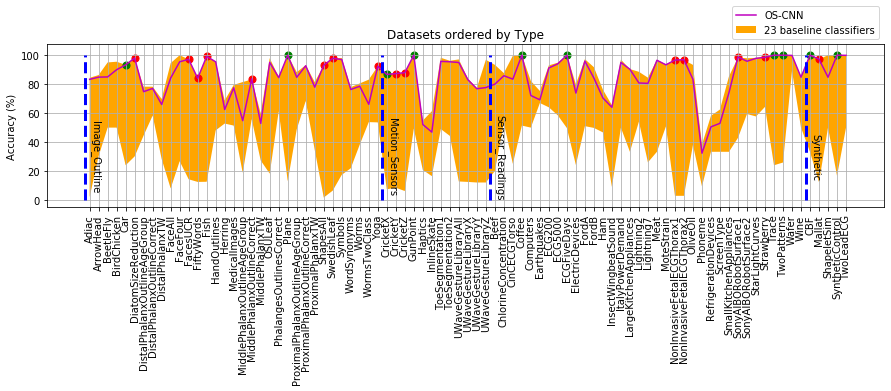

In [12]:
result_path = './Full_result.csv'
file = pd.read_csv(result_path)
dataset_type_list= [Image_Outline, Motion_Sensors, Sensor_Readings,Synthetic]
dataset_type_name_list= ['Image_Outline', 'Motion_Sensors', 'Sensor_Readings','Synthetic']


df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

big_result_block = []
name_list = []

for dataset_type_index,dataset_type in enumerate(dataset_type_list):

    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)    
        for j, Baseline_name in enumerate (get_result_list):
            temp = file.iloc[dfb][Baseline_name]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
            
    if len(big_result_block)==0:
        big_result_block = result_block
        name_list = dataset_type
    else:
        name_list = name_list+dataset_type
        big_result_block = np.concatenate((big_result_block,result_block),axis=0,)
    
    average_rank, wins= get_average_rank_and_wins(result_block)
    
    wins2= np.round(wins*100/len(data_name_list),2)

draw_a_weasel_graph(big_result_block,name_list,dataset_class_name=[dataset_type_list,dataset_type_name_list], main_classifer_name= 'OS-CNN')